In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = 'CSV_files/nba_players.csv'  # Ensure this file exists
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()

Dataset loaded successfully!


In [3]:
data

,id,first_name,last_name,position,id_team,abbreviation,city,conference,division,full_name,name
0,14,Ike,Anigbogu,C,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
1,25,Ron,Baker,G,20,NYK,New York,East,Atlantic,New York Knicks,Knicks
2,47,Jabari,Bird,G,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
3,67,MarShon,Brooks,G,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies
4,71,Lorenzo,Brown,G,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
5,90,Omri,Casspi,F,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies
6,1,Alex,Abrines,G,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder
7,119,Tyler,Davis,C,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder
8,149,Keenan,Evans,G,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
9,179,Marcin,Gortat,C,13,LAC,LA,West,Pacific,LA Clippers,Clippers


In [4]:
display(data.head())
print("Dataset Shape:", data.shape)
display(data.info())
display(data.describe(include='all'))

# Step 3: Data Cleaning
# Drop duplicate rows (if any)
data.drop_duplicates(inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

,id,first_name,last_name,position,id_team,abbreviation,city,conference,division,full_name,name
0,14,Ike,Anigbogu,C,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
1,25,Ron,Baker,G,20,NYK,New York,East,Atlantic,New York Knicks,Knicks
2,47,Jabari,Bird,G,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
3,67,MarShon,Brooks,G,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies
4,71,Lorenzo,Brown,G,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


Dataset Shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   int64 
 1   first_name    1000 non-null   object
 2   last_name     1000 non-null   object
 3   position      87 non-null     object
 4   id_team       1000 non-null   int64 
 5   abbreviation  1000 non-null   object
 6   city          1000 non-null   object
 7   conference    1000 non-null   object
 8   division      1000 non-null   object
 9   full_name     1000 non-null   object
 10  name          1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


None

,id,first_name,last_name,position,id_team,abbreviation,city,conference,division,full_name,name
count,1000.000000,1000,1000,87,1000.000000,1000,1000,1000,1000,1000,1000
unique,NaN,522,709,6,NaN,29,29,2,6,29,29
top,NaN,Chris,Smith,G,NaN,DEN,Denver,West,Southeast,Denver Nuggets,Nuggets
freq,NaN,21,17,40,NaN,46,46,504,191,46,46
mean,939.925000,NaN,NaN,NaN,15.003000,NaN,NaN,NaN,NaN,NaN,NaN
std,311.076499,NaN,NaN,NaN,8.742736,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,699.750000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,949.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1199.250000,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
 id                0
first_name        0
last_name         0
position        909
id_team           0
abbreviation      0
city              0
conference        0
division          0
full_name         0
name              0
dtype: int64


In [5]:
data['position'].fillna('Unknown', inplace=True)

C:\Users\Ken\AppData\Local\Temp\ipykernel_15336\3918523876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['position'].fillna('Unknown', inplace=True)


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='position', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'G'),
  Text(2, 0, 'F'),
  Text(3, 0, 'C'),
  Text(4, 0, 'C-F'),
  Text(5, 0, 'F-C'),
  Text(6, 0, 'G-F')])

Text(0.5, 1.0, 'Count of Players by Position')

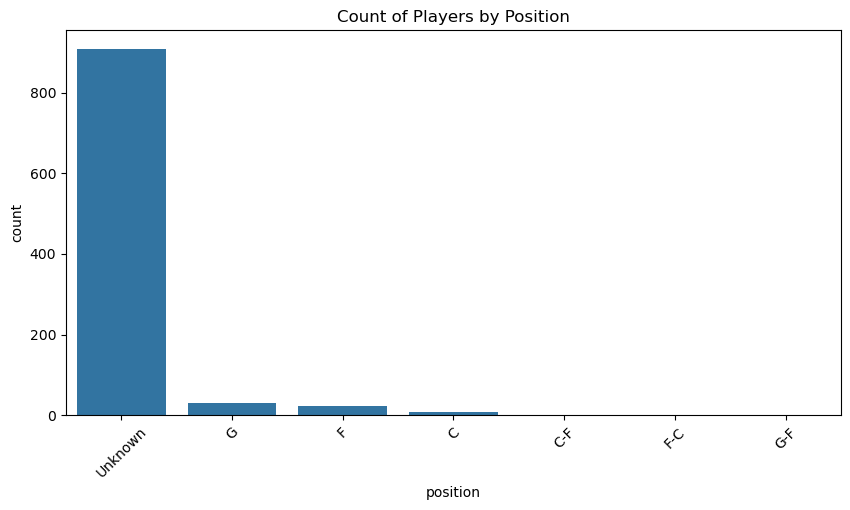

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='position', data=data, order=data['position'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Players by Position')
# plt.savefig('Count of Players by Position.png', dpi=300)
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='conference', ylabel='count'>

Text(0.5, 1.0, 'Number of Teams by Conference')

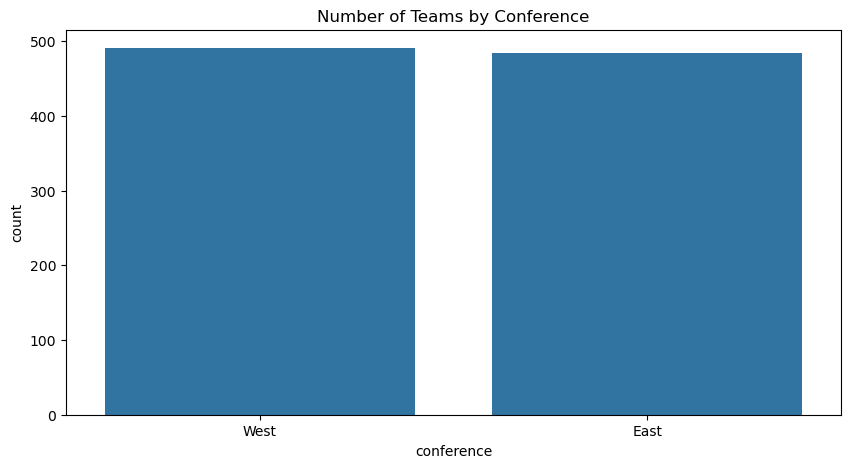

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='conference', data=data, order=data['conference'].value_counts().index)
plt.title('Number of Teams by Conference')
# plt.savefig('Number of Teams by Conference.png', dpi=300)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='division', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Pacific'),
  Text(2, 0, 'Northwest'),
  Text(3, 0, 'Central'),
  Text(4, 0, 'Atlantic'),
  Text(5, 0, 'Southwest')])

Text(0.5, 1.0, 'Number of Teams by Division')

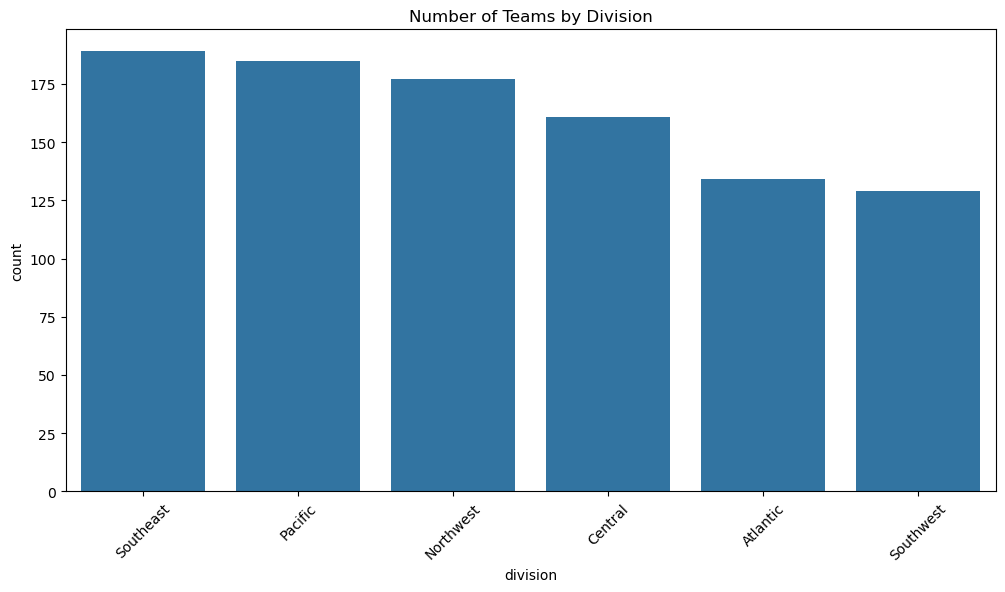

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='division', data=data, order=data['division'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Teams by Division')
plt.savefig('Number of Teams by Division.png', dpi=300)
plt.show()

In [8]:
data['full_name'] = data['first_name'] + ' ' + data['last_name']

In [9]:
print("\nSummary Statistics by Conference:")
display(data.groupby('conference').size())

print("\nSummary Statistics by Position:")
display(data.groupby('position').size())

print("\nSummary Statistics by Division:")
display(data.groupby('division').size())



Summary Statistics by Conference:


conference
East    484
West    491
dtype: int64


Summary Statistics by Position:


position
C            9
C-F          1
F           24
F-C          1
G           30
G-F          1
Unknown    909
dtype: int64


Summary Statistics by Division:


division
Atlantic     134
Central      161
Northwest    177
Pacific      185
Southeast    189
Southwest    129
dtype: int64

In [ ]:
cleaned_file = 'nba_players_cleaned.csv'
data.to_csv(cleaned_file, index=False)
print(f"\nCleaned dataset saved as '{cleaned_file}'")

In [19]:
data['is_guard'] = np.where(data['position'] == 'G', 1, 0)  # Binary classification (Guard = 1, Others = 0)

# Features (excluding the target and unnecessary columns)
X = data.drop(columns=['first_name', 'last_name', 'full_name', 'position', 'is_guard'])
y = data['is_guard']

# Identify numerical and categorical features
num_features = ['id', 'id_team']  # Example numerical features
cat_features = ['abbreviation', 'city', 'conference', 'division', 'name']  # Categorical features

In [20]:
# Step 4: Data Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Step 5: Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [21]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'id_team']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['abbreviation', 'city',
                                                   'conference', 'division',
                                                   'name'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9846

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       192
           1       0.00      0.00      0.00         3

    accuracy                           0.98       195
   macro avg       0.49      0.50      0.50       195
weighted avg       0.97      0.98      0.98       195



C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(45.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

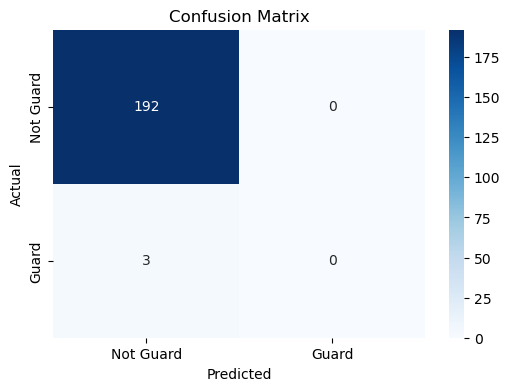

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Guard', 'Guard'], yticklabels=['Not Guard', 'Guard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix.png', dpi=300)
plt.show()


In [ ]:
data.to_csv('nba_players_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'nba_players_cleaned.csv'")